# CA6 - Question Answering using Bert, Albert

# Part 2 - PersianQA Dataset 

Import libraries

In [1]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import json
import pandas as pd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_path = '/content/drive/MyDrive/Sheyda/Data - QA/Persian-QA'

## Preprocessing Datasets

In [5]:
def json_to_dataframe(file):
    f = open ( file , "r") 
    data = json.loads(f.read())               #loading the json file.
    iid = []                                  
    tit = []                                  #Creating empty lists to store values.
    con = []
    Que = []
    ans = []
    
    for i in range(len(data['data'])):       #Root tag of the json file contains 'title' tag & 'paragraphs' list.
        for p in range(len(data['data'][i]['paragraphs'])):  # 'paragraphs' list contains 'context' tag & 'qas' list.
            context = data['data'][i]['paragraphs'][p]['context']
            for q in range(len(data['data'][i]['paragraphs'][p]['qas'])):  # 'qas' list contains 'question', 'Id' tag & 'answers' list.
                question = data['data'][i]['paragraphs'][p]['qas'][q]['question']
                Id = data['data'][i]['paragraphs'][p]['qas'][q]['id']
                answer_texts = [] 
                answer_starts = []
                for a in range(len(data['data'][i]['paragraphs'][p]['qas'][q]['answers'])): # 'answers' list contains 'ans_start', 'text' tags. 
                    answer_texts.append(data['data'][i]['paragraphs'][p]['qas'][q]['answers'][a]['text'])
                    answer_starts.append(data['data'][i]['paragraphs'][p]['qas'][q]['answers'][a]['answer_start'])
                    if len(answer_texts) == 0:
                      answer_texts.append('')
                      answer_starts.append(0)
                    con.append(context)
                    Que.append(question)                    # Appending values to lists
                    iid.append(Id)
                    ans.append({'text': answer_texts, 'answer_start': answer_starts })

    new_df = pd.DataFrame(columns=['id','context','question','answers']) # Creating empty DataFrame.
    new_df.id = iid
    new_df.context = con
    new_df.question = Que
    new_df.answers = ans

    return new_df

In [6]:
train_df = json_to_dataframe(os.path.join(data_path,'pqa_train.json'))

In [7]:
train_df.head()

,id,context,question,answers
0,1,شرکت فولاد مبارکۀ اصفهان، بزرگ‌ترین واحد صنعتی...,شرکت فولاد مبارکه در کجا واقع شده است,"{'text': ['در شرق شهر مبارکه'], 'answer_start'..."
1,2,شرکت فولاد مبارکۀ اصفهان، بزرگ‌ترین واحد صنعتی...,فولاد مبارکه چند بار برنده جایزه شرکت دانشی را...,"{'text': ['۶'], 'answer_start': [263]}"
2,3,شرکت فولاد مبارکۀ اصفهان، بزرگ‌ترین واحد صنعتی...,شرکت فولاد مبارکه در سال ۱۳۹۱ چه جایزه ای برد؟,{'text': ['تندیس زرین جایزۀ ملی تعالی سازمانی'...
3,4,شرکت فولاد مبارکۀ اصفهان، بزرگ‌ترین واحد صنعتی...,بزرگ ترین مجموعه تولید فولاد ایران چیست؟,"{'text': ['شرکت فولاد مبارکۀ'], 'answer_start'..."
4,5,شرکت فولاد مبارکۀ اصفهان، بزرگ‌ترین واحد صنعتی...,فولاد مبارکه در چه سالی احداث شد؟,"{'text': ['۱۳۷۱'], 'answer_start': [504]}"


In [8]:
test_df = json_to_dataframe(os.path.join(data_path,'pqa_test.json'))
test_df.head()

,id,context,question,answers
0,9101,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,پایتخت اسپانیا کجاست؟,"{'text': ['مادرید', 'مادرید'], 'answer_start':..."
1,9101,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,پایتخت اسپانیا کجاست؟,"{'text': ['مادرید', 'مادرید'], 'answer_start':..."
2,9103,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,بر چه اساسی رئال موفق ترین تیم در تاریخ فوتبال...,"{'text': ['فیفا', 'به انتخاب فیفا'], 'answer_s..."
3,9103,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,بر چه اساسی رئال موفق ترین تیم در تاریخ فوتبال...,"{'text': ['فیفا', 'به انتخاب فیفا'], 'answer_s..."
4,9105,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,رئال مادرید چند بار در لیگ قهرمانان اروپا به ع...,"{'text': ['۱۳', '۱۳'], 'answer_start': [329, 3..."


In [9]:
val_df = json_to_dataframe(os.path.join(data_path,'pqa_test.json'))
val_df.head()

,id,context,question,answers
0,9101,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,پایتخت اسپانیا کجاست؟,"{'text': ['مادرید', 'مادرید'], 'answer_start':..."
1,9101,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,پایتخت اسپانیا کجاست؟,"{'text': ['مادرید', 'مادرید'], 'answer_start':..."
2,9103,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,بر چه اساسی رئال موفق ترین تیم در تاریخ فوتبال...,"{'text': ['فیفا', 'به انتخاب فیفا'], 'answer_s..."
3,9103,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,بر چه اساسی رئال موفق ترین تیم در تاریخ فوتبال...,"{'text': ['فیفا', 'به انتخاب فیفا'], 'answer_s..."
4,9105,باشگاه فوتبال رئال مادرید یک باشگاه حرفه‌ای فو...,رئال مادرید چند بار در لیگ قهرمانان اروپا به ع...,"{'text': ['۱۳', '۱۳'], 'answer_start': [329, 3..."


In [10]:
from datasets import Dataset
train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test_df)

In [11]:
train_ds[1]

{'answers': {'answer_start': [263], 'text': ['۶']},
 'context': 'شرکت فولاد مبارکۀ اصفهان، بزرگ\u200cترین واحد صنعتی خصوصی در ایران و بزرگ\u200cترین مجتمع تولید فولاد در کشور ایران است، که در شرق شهر مبارکه قرار دارد. فولاد مبارکه هم\u200cاکنون محرک بسیاری از صنایع بالادستی و پایین\u200cدستی است. فولاد مبارکه در ۱۱ دوره جایزۀ ملی تعالی سازمانی و ۶ دوره جایزۀ شرکت دانشی در کشور رتبۀ نخست را بدست آورده\u200cاست و همچنین این شرکت در سال ۱۳۹۱ برای نخستین\u200cبار به عنوان تنها شرکت ایرانی با کسب امتیاز ۶۵۴ تندیس زرین جایزۀ ملی تعالی سازمانی را از آن خود کند. شرکت فولاد مبارکۀ اصفهان در ۲۳ دی ماه ۱۳۷۱ احداث شد و اکنون بزرگ\u200cترین واحدهای صنعتی و بزرگترین مجتمع تولید فولاد در ایران است. این شرکت در زمینی به مساحت ۳۵ کیلومتر مربع در نزدیکی شهر مبارکه و در ۷۵ کیلومتری جنوب غربی شهر اصفهان واقع شده\u200cاست. مصرف آب این کارخانه در کمترین میزان خود، ۱٫۵٪ از دبی زاینده\u200cرود برابر سالانه ۲۳ میلیون متر مکعب در سال است و خود یکی از عوامل کم\u200cآبی زاینده\u200cرود شناخته می\u200cشود.',
 'id'

In [12]:
train_ds

Dataset({
    features: ['id', 'context', 'question', 'answers'],
    num_rows: 6306
})

In [13]:
train_ds['answers'][0]

{'answer_start': [114], 'text': ['در شرق شهر مبارکه']}

## Pars Bert config

In [14]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, AutoModelForQuestionAnswering
from transformers import TrainingArguments
import transformers

In [17]:
config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
model = AutoModelForQuestionAnswering.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624M [00:00<?, ?B/s]

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initia

Max Length = 340

In [19]:
for i, example in enumerate(train_ds):
    if len(tokenizer(example["question"], example["context"])["input_ids"]) > 318:
        break
example = train_ds[i]

In [20]:
example

{'answers': {'answer_start': [542],
  'text': ['مکانهایی که انسان قادر به حیات نیست']},
 'context': 'رباتیک شاخه\u200cای میان رشته\u200cای از مهندسی و علم است که شامل مهندسی مکانیک، مهندسی برق و علوم رایانه و چند رشته دیگر می\u200cشود. رباتیک شامل طراحی، ساخت، راه اندازی و استفاده از رباتها می\u200cشود، همچنین مانند سیستم\u200cهای رایانه\u200cای، کنترل، بازخورد حسگرها و پردازش اطلاعات نیز در این گروه قرار می\u200cگیرند. این فناوریها استفاده می\u200cشوند تا ماشین\u200cها را به گونه\u200cای ارتقا دهند که جایگزین انسان گردند. رباتها می\u200cتوانند در هر موقعیت و برای هر منظوری به کار بروند ولی امروزه بسیاری از آن\u200cها در محیط\u200cهای خطرناک ( مانند تشخیص و غیر فعال\u200cسازی بمبها )، فرایندهای تولید یا مکانهایی که انسان قادر به حیات نیست، استفاده می\u200cشوند. رباتها می\u200cتوانند به هر شکل و قیافه\u200cای باشند ولی بعضی از آن\u200cها طراحی می\u200cشوند تا شبیه انسان به نظر برسند. گفته می\u200cشود که این کار به این دلیل صورت می\u200cگیرد تا رفتارهای این رباتها که از مردم عادی تقلید م

In [21]:
len(tokenizer(example["question"], example["context"])["input_ids"])

320

In [22]:
max_length = 300 # The maximum length of a feature (question and context)

In [23]:
def prepare_train_features(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        # stride=stride,
        # return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )
  
    offset_mapping = inputs.pop("offset_mapping")
    # sample_map = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        # sample_idx = sample_map[i]
        answer = answers[i]
        
        if answer['text'][0] == '':
           start_positions.append(0)
           end_positions.append(0)
           continue
        
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [24]:
tokenized_train = train_ds.map(prepare_train_features, batched=True, remove_columns=train_ds.column_names)

Parameter 'function'=<function prepare_train_features at 0x7fe11eb993b0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/7 [00:00<?, ?ba/s]

In [25]:
tokenized_val = val_ds.map(prepare_train_features, batched=True, remove_columns=val_ds.column_names)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [26]:
train_ds.column_names

['id', 'context', 'question', 'answers']

In [27]:
def preprocess_test_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        # stride=stride,
        # return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    # sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        # sample_idx = sample_map[i]
        # example_ids.append(examples["id"][i])
        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    # inputs["example_id"] = example_ids
    return inputs

In [28]:
dataset_test_preprocessed = test_ds.map(
    preprocess_test_examples,
    batched=True,
    remove_columns=['context', 'answers', 'question'],
)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [29]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [30]:
from datasets import load_metric
metric = load_metric("squad")

In [30]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    "bert-finetuned-squad",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,

)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 6306
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2367


Epoch,Training Loss,Validation Loss
1,3.510500,2.100585
2,1.849300,2.007501
3,1.305600,2.116803


***** Running Evaluation *****
  Num examples = 1302
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-789
Configuration saved in bert-finetuned-squad/checkpoint-789/config.json
Model weights saved in bert-finetuned-squad/checkpoint-789/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-789/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-789/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1302
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-1578
Configuration saved in bert-finetuned-squad/checkpoint-1578/config.json
Model weights saved in bert-finetuned-squad/checkpoint-1578/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-1578/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-1578/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1302
  Batch size = 8
Saving 

TrainOutput(global_step=2367, training_loss=2.0887144835729563, metrics={'train_runtime': 1236.4129, 'train_samples_per_second': 15.301, 'train_steps_per_second': 1.914, 'total_flos': 2896413306991200.0, 'train_loss': 2.0887144835729563, 'epoch': 3.0})

In [31]:
trainer.save_model("test-squad-trained")

Saving model checkpoint to test-squad-trained
Configuration saved in test-squad-trained/config.json
Model weights saved in test-squad-trained/pytorch_model.bin
tokenizer config file saved in test-squad-trained/tokenizer_config.json
Special tokens file saved in test-squad-trained/special_tokens_map.json


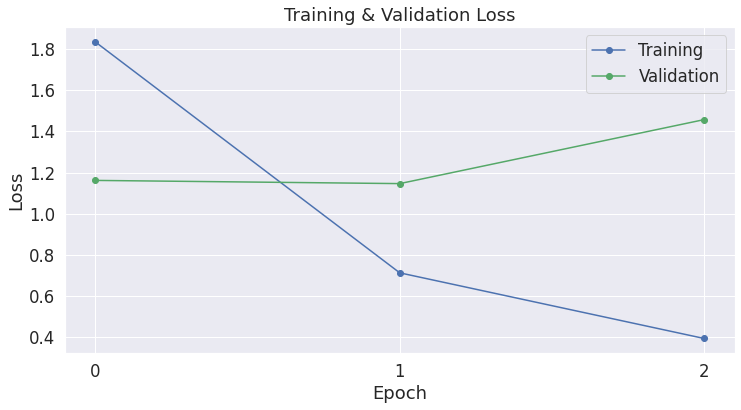

In [32]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot([1.834100, 0.713400,0.394800	], 'b-o', label="Training")
plt.plot([1.162066, 1.146545, 1.457134], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(list(range(3)))

plt.show()


In [33]:
predictions, a, b = trainer.predict(dataset_test_preprocessed)


The following columns in the test set don't have a corresponding argument in `BertForQuestionAnswering.forward` and have been ignored: id, offset_mapping. If id, offset_mapping are not expected by `BertForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1302
  Batch size = 8


In [34]:
b

{'test_runtime': 24.8659,
 'test_samples_per_second': 52.361,
 'test_steps_per_second': 6.555}

In [36]:
from tqdm.auto import tqdm

import collections

import numpy as np

n_best = 1000
max_answer_length = 50


def compute_metrics(start_logits, end_logits, features, examples):
    # example_to_features = collections.defaultdict(list)
    # for idx, feature in enumerate(features):
        # example_to_features[feature["example_id"]].append(idx)

    predicted_answers = []
    for i, example in enumerate(examples):
        example_id = example["id"]
        context = example["context"]
        answers = []
        start_logit = start_logits[i]
        end_logit = end_logits[i]
        offsets = features[i]["offset_mapping"]
        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        for start_index in start_indexes:
            for end_index in end_indexes:
                # Skip answers that are not fully in the context
                if offsets[start_index] is None or offsets[end_index] is None:
                    continue
                # Skip answers with a length that is either < 0 or > max_answer_length
                if (
                    end_index < start_index
                    or end_index - start_index + 1 > max_answer_length
                ):
                    continue

                answer = {
                    "text": context[offsets[start_index][0] : offsets[end_index][1]],
                    "logit_score": start_logit[start_index] + end_logit[end_index],
                }
                answers.append(answer)

        # Loop through all features associated with that example
        # for feature_index in example_to_features[example_id]:
            # start_logit = start_logits[feature_index]
            # end_logit = end_logits[feature_index]
            # offsets = features[feature_index]["offset_mapping"]

            
        # Select the answer with the best score
        if len(answers) > 0:
            best_answer = max(answers, key=lambda x: x["logit_score"])
            predicted_answers.append(
                {"id": example_id, "prediction_text": best_answer["text"]}
            )
        else:
            predicted_answers.append({"id": example_id, "prediction_text": ""})

    theoretical_answers = [{"id": ex["id"], "answers": ex["answers"]} for ex in examples]
    return metric.compute(predictions=predicted_answers, references=theoretical_answers)

In [36]:
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, dataset_test_preprocessed, test_ds)


{'exact_match': 41.62826420890937, 'f1': 67.28185488054929}

## َAlbert Config

In [17]:
config = AutoConfig.from_pretrained("HooshvareLab/albert-fa-zwnj-base-v2")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/albert-fa-zwnj-base-v2")
model = AutoModelForQuestionAnswering.from_pretrained("HooshvareLab/albert-fa-zwnj-base-v2")

Some weights of the model checkpoint at HooshvareLab/albert-fa-zwnj-base-v2 were not used when initializing AlbertForQuestionAnswering: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForQuestionAnswering were not initialized from the model checkpoint at HooshvareLab/albert-fa-zwnj-base-v2 and are newly initialized: ['qa_outputs.bias', 'qa_ou

In [18]:
os.system('CUDA_LAUNCH_BLOCKING=1')

0

In [31]:
from transformers import Trainer
from transformers import TrainingArguments

args = TrainingArguments(
    "bert-finetuned-squad",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    # fp16=True,
    # push_to_hub=False,
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer
)
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 6306
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2367


Epoch,Training Loss,Validation Loss
1,5.703300,5.703781
2,5.651000,4.573941
3,4.256100,3.735383


***** Running Evaluation *****
  Num examples = 1302
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-789
Configuration saved in bert-finetuned-squad/checkpoint-789/config.json
Model weights saved in bert-finetuned-squad/checkpoint-789/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-789/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-789/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1302
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-1578
Configuration saved in bert-finetuned-squad/checkpoint-1578/config.json
Model weights saved in bert-finetuned-squad/checkpoint-1578/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-1578/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-1578/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1302
  Batch size = 8
Saving 

TrainOutput(global_step=2367, training_loss=5.1033711209798795, metrics={'train_runtime': 1152.7006, 'train_samples_per_second': 16.412, 'train_steps_per_second': 2.053, 'total_flos': 244793781871200.0, 'train_loss': 5.1033711209798795, 'epoch': 3.0})

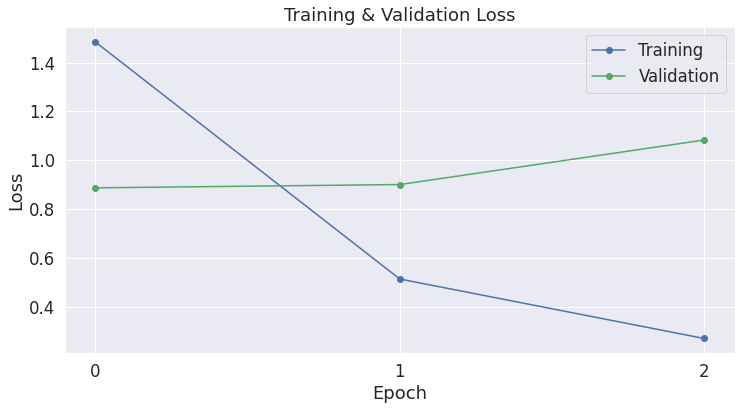

In [32]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot([1.484000	, 0.514900,0.271800		], 'b-o', label="Training")
plt.plot([0.887569, 0.901105, 1.083094], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(list(range(3)))

plt.show()

In [33]:
predictions, a, b = trainer.predict(dataset_test_preprocessed)


The following columns in the test set don't have a corresponding argument in `AlbertForQuestionAnswering.forward` and have been ignored: id, offset_mapping. If id, offset_mapping are not expected by `AlbertForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1302
  Batch size = 8


In [34]:
b

{'test_runtime': 27.5262,
 'test_samples_per_second': 47.3,
 'test_steps_per_second': 5.922}

In [37]:
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, dataset_test_preprocessed, test_ds)


{'exact_match': 11.059907834101383, 'f1': 28.125867315098088}